# Gatherer

Although data can directly be passed to the `Manager` class by the user, Pyatoa provides some mid-level classes that deal with automated data gathering, from local directory structures, `ASDFDataSet`s or with queries to the International Federation of Digital Seismographs web service using the ObsPy `Client` module.

---
## Event metadata

Event data can be gathered using the ObsPy FDSN web service client using the `Config.client` parameter.  

As an example we'll gather event information from the [M<sub>w</sub>7.8 Kaikoura Earthquake, New Zealand](http://ds.iris.edu/ds/nodes/dmc/tools/event/5197722).


In [1]:
from pyatoa import logger, Config, Manager
logger.setLevel("DEBUG")

In [2]:
cfg = Config(client="IRIS", event_id="5197722")
mgmt = Manager(config=cfg)
mgmt.gather(choice="event", try_fm=False)  # try_fm argument addressed next
mgmt.event

[2022-03-02 15:07:29] - pyatoa - DEBUG: Component list set to E/N/Z
[2022-03-02 15:07:30] - pyatoa - DEBUG: gathering event
[2022-03-02 15:07:30] - pyatoa - INFO: searching local filesystem for event info
[2022-03-02 15:07:30] - pyatoa - INFO: no local event file found
[2022-03-02 15:07:30] - pyatoa - DEBUG: event ID: 5197722, querying client IRIS


Event:	2016-11-13T11:02:59.070000Z | -42.724, +173.065 | 7.8 Mww

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=5197722")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=11363410")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=177181336")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

### GCMT focal mechanisms

Events gathered using the IRIS webservice may also query the [Harvard GCMT moment tensor catalog](https://www.globalcmt.org/CMTsearch.html) for matching focal mechanism information. If we set the `try_fm` argument to `True` in the `gather` function, it will search for matching moment tensor information using the `Event` origin time and magnitude.

In [3]:
mgmt = Manager(config=cfg)
mgmt.gather(choice="event", try_fm=True)

[2022-03-02 15:07:30] - pyatoa - DEBUG: gathering event
[2022-03-02 15:07:30] - pyatoa - INFO: searching local filesystem for event info
[2022-03-02 15:07:30] - pyatoa - INFO: no local event file found
[2022-03-02 15:07:30] - pyatoa - DEBUG: event ID: 5197722, querying client IRIS
[2022-03-02 15:07:30] - pyatoa - INFO: querying GCMT database for moment tensor
[2022-03-02 15:07:31] - pyatoa - INFO: GCMT event found matching criteria


Manager Data
    dataset   [ds]:        None
    quakeml   [event]:     smi:local/ndk/C201611131102A/event
    station   [inv]:       None
    observed  [st_obs]:    None
    synthetic [st_syn]:    None
Stats & Status
    half_dur:              19.8
    time_offset_sec:       None
    standardized:          False
    obs_processed:         False
    syn_processed:         False
    nwin   [windows]:      None
    misfit [adjsrcs]:      None

In [4]:
mgmt.event

Event:	2016-11-13T11:03:53.200000Z | -42.030, +173.850 | 7.82 Mwc

	                  resource_id: ResourceIdentifier(id="smi:local/ndk/C201611131102A/event")
	                   event_type: 'earthquake'
	         event_type_certainty: 'known'
	          preferred_origin_id: ResourceIdentifier(id="smi:local/ndk/C201611131102A/origin#cmtorigin")
	       preferred_magnitude_id: ResourceIdentifier(id="smi:local/ndk/C201611131102A/magnitude#moment_mag")
	 preferred_focal_mechanism_id: ResourceIdentifier(id="smi:local/ndk/C201611131102A/focal_mechanism")
	                         ---------
	           event_descriptions: 2 Elements
	             focal_mechanisms: 1 Elements
	                      origins: 2 Elements
	                   magnitudes: 3 Elements

In [5]:
mgmt.event.preferred_focal_mechanism().moment_tensor

MomentTensor
	          resource_id: ResourceIdentifier(id="smi:local/ndk/C201611131102A/momenttensor")
	    derived_origin_id: ResourceIdentifier(id="smi:local/ndk/C201611131102A/origin#cmtorigin")
	        scalar_moment: 6.697e+20
	               tensor: Tensor(m_rr=3.56e+20 [uncertainty=2.2e+18], m_tt=1.69e+20 [uncertainty=1.4e+18], m_pp=-5.25e+20 [uncertainty=1.5e+18], m_rt=-1.14e+20 [uncertainty=1.4e+19], m_rp=4.34e+20 [uncertainty=1.64e+19], m_tp=-2.04e+20 [uncertainty=1e+18])
	 source_time_function: SourceTimeFunction(type='triangle', duration=39.6)
	       inversion_type: 'zero trace'
	        creation_info: CreationInfo(agency_id='GCMT', version='V10')
	                 ---------
	            data_used: 3 Elements

/home/bchow/miniconda3/envs/docs/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/bchow/miniconda3/envs/docs/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


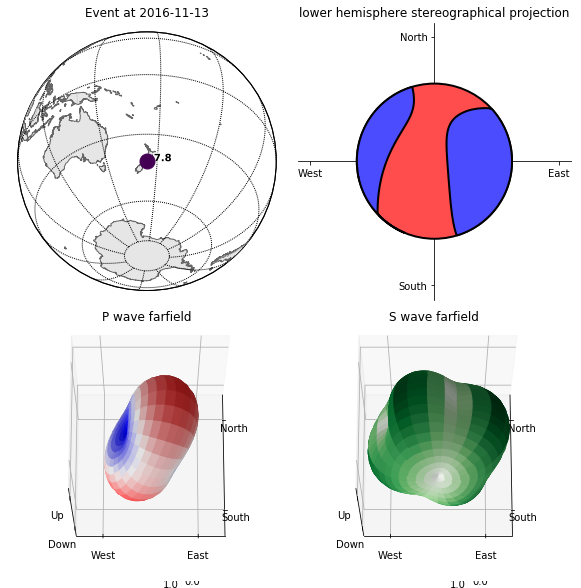

In [6]:
mgmt.event.plot();

### New Zealand event metadata from GeoNet

Pyatoa was originally designed for the New Zealand tomography problem, so functions are available for querying the [GeoNet regional moment tensor catalog](https://github.com/GeoNet/data/blob/master/moment-tensor/GeoNet_CMT_solutions.csv
). 

> **__NOTE__:** GeoNet moment tensors are automatically converted to GCMT convention, i.e. from XYZ to RTP (m_rr, m_tt, m_pp...) coordinates and into units of N*m.

Let's try to grab to same [M<sub>w</sub>7.8 Kaikoura Earthquake](https://www.geonet.org.nz/earthquake/2016p858000) using its unique GeoNet identifier.

In [7]:
cfg = Config(client="GEONET", event_id="2016p858000")
mgmt = Manager(config=cfg)
mgmt.gather(choice="event", try_fm=True)

[2022-03-02 15:07:34] - pyatoa - DEBUG: Component list set to E/N/Z
[2022-03-02 15:07:34] - pyatoa - DEBUG: gathering event
[2022-03-02 15:07:34] - pyatoa - INFO: searching local filesystem for event info
[2022-03-02 15:07:34] - pyatoa - INFO: no local event file found
[2022-03-02 15:07:34] - pyatoa - DEBUG: event ID: 2016p858000, querying client GEONET
[2022-03-02 15:07:35] - pyatoa - INFO: geonet moment tensor found for: 2016p858000
[2022-03-02 15:07:35] - pyatoa - DEBUG: GeoNet moment tensor is in units of Newton*meters
[2022-03-02 15:07:35] - pyatoa - INFO: GeoNet moment tensor appended to Event


Manager Data
    dataset   [ds]:        None
    quakeml   [event]:     smi:nz.org.geonet/2016p858000
    station   [inv]:       None
    observed  [st_obs]:    None
    synthetic [st_syn]:    None
Stats & Status
    half_dur:              21.35020886946541
    time_offset_sec:       None
    standardized:          False
    obs_processed:         False
    syn_processed:         False
    nwin   [windows]:      None
    misfit [adjsrcs]:      None

In [8]:
mgmt.event

Event:	2016-11-13T11:02:56.346094Z | -42.693, +173.022 | 7.820379733 Mw(mB) | manual

	                  resource_id: ResourceIdentifier(id="smi:nz.org.geonet/2016p858000")
	                   event_type: 'earthquake'
	                creation_info: CreationInfo(agency_id='WEL(GNS_Primary)', author='scevent@akeqp01.geonet.org.nz', creation_time=UTCDateTime(2016, 11, 13, 11, 3, 27, 886738))
	          preferred_origin_id: ResourceIdentifier(id="smi:nz.org.geonet/Origin#20161116052725.210418.52361")
	       preferred_magnitude_id: ResourceIdentifier(id="smi:nz.org.geonet/Magnitude#20161116052734.469407.55057")
	 preferred_focal_mechanism_id: ResourceIdentifier(id="smi:local/995f6187-eac9-43e1-a645-79e05a25caaa")
	                         ---------
	           event_descriptions: 1 Elements
	                     comments: 1 Elements
	                        picks: 189 Elements
	                   amplitudes: 200 Elements
	             focal_mechanisms: 1 Elements
	                      or

In [9]:
mgmt.event.preferred_focal_mechanism().moment_tensor

MomentTensor
	          resource_id: ResourceIdentifier(id="smi:local/d057a11d-49b3-4b90-b0df-65abca382624")
	        scalar_moment: 7.04e+20
	               tensor: Tensor(m_rr=4.8e+20, m_tt=1.73e+20, m_pp=-6.53e+20, m_rt=-9.32e+19, m_rp=2.95e+20, m_tp=-2.39e+20)
	   variance_reduction: -1.0
	        double_couple: 0.57
	 source_time_function: SourceTimeFunction(duration=42.70041773893082)

/home/bchow/miniconda3/envs/docs/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/bchow/miniconda3/envs/docs/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


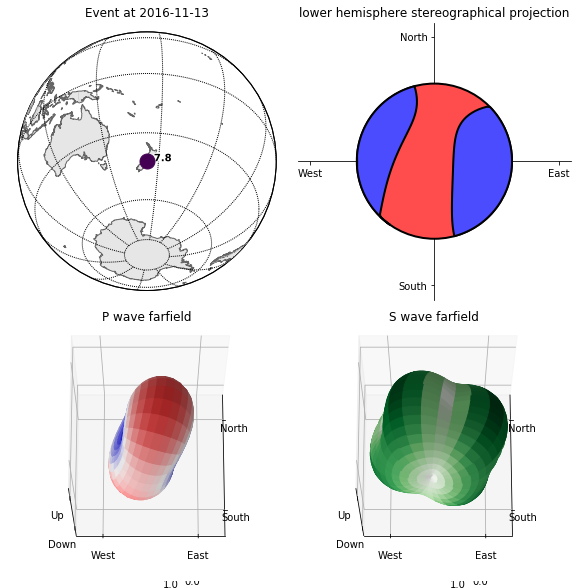

In [10]:
mgmt.event.plot();

---
## Station metadata from local file system

Station metadata can be gathered from local file systems following SEED response file naming conventions. The paths to response files can be specified in the `Config.paths['responses']` list.

### Naming Convention

By default, responses are searched for using file name and directory structure templates that follow SEED formatting. This is defined as:

**Default Directory Template:** path/to/responses/SSS.NN  
**Default File ID Template:** RESP.NN.SSS.LL.CCC

* NN: The network code (e.g. NZ)  
* SSS: The station code (e.g. BFZ)  
* LL: The location code (e.g. 10)  
* CCC: The channel code (e.g. HHZ.D)  

An example directory for station NZ.BFZ: **path/to/response/BFZ.NZ/RESP.NZ.BFZ.10.HHZ**

!!! Include a link to the distribute_dataless script !!!

In [11]:
cfg = Config(paths={"responses": ["../tests/test_data/test_seed"]})
mgmt = Manager(config=cfg)
mgmt.gather(code="NZ.BFZ.??.HH?", choice=["inv"]);

[2022-03-02 15:07:38] - pyatoa - DEBUG: Component list set to E/N/Z
[2022-03-02 15:07:38] - pyatoa - INFO: gathering data for NZ.BFZ.??.HH?
[2022-03-02 15:07:38] - pyatoa - INFO: gathering StationXML
[2022-03-02 15:07:38] - pyatoa - INFO: searching local filesystem for station info
[2022-03-02 15:07:38] - pyatoa - DEBUG: searching for responses: ../tests/test_data/test_seed/BFZ.NZ/RESP.NZ.BFZ.??.HH?
[2022-03-02 15:07:38] - pyatoa - INFO: retrieved response locally:
../tests/test_data/test_seed/BFZ.NZ/RESP.NZ.BFZ.10.HHE
[2022-03-02 15:07:38] - pyatoa - INFO: retrieved response locally:
../tests/test_data/test_seed/BFZ.NZ/RESP.NZ.BFZ.10.HHN
[2022-03-02 15:07:38] - pyatoa - INFO: retrieved response locally:
../tests/test_data/test_seed/BFZ.NZ/RESP.NZ.BFZ.10.HHZ
[2022-03-02 15:07:38] - pyatoa - INFO: matching StationXML found


---
## Observed waveforms from local file system

Observed waveforms can either be collected from a local file system or using the ObsPy webservice client. Waveform gathering is based on event origin time, therefore an `Event` object must be present for data gathering to work properly.

### Naming convention

By default, observed waveforms are searched for using file name and directory structure templates that follow SEED formatting. This is defined as:

**Default Directory Template:** path/to/observed/YYYY/NN/SSS/CCC/  
**Default File ID Template:** NN.SSS.LL.CCC.YYYY.DDD  

* YYYY: The year with the century (e.g., 1987)  
* NN: The network code (e.g. NZ)  
* SSS: The station code (e.g. BFZ)  
* LL: The location code (e.g. 10)  
* CCC: The channel code (e.g. HHZ.D)  
* DDD: The julian day of the year (January 1 is 001)

An example directory for station NZ.BFZ, for the day 2018-02-18: **path/to/observed/2018/NZ/BFZ/HHZ/NZ.BFZ.10.HHZ.D.2018.049**

User-defined paths can be provided to the `Config.paths` attribute, which takes the form of a dictionary of lists. Multiple paths can be passed to each list, and data gathering routines will search each path in order until relevant data is found. 

### Eketahuna example

Here we will gather event metadata for the [M6.2 Eketahuna earthquake, New Zealand](https://www.geonet.org.nz/earthquake/2014p051675), and use its origintime to gather observed waveforms from the test data directory, for which a matching directory structure has already been created. We add a dummy path to show that how multiple paths can be passed to the `paths` attribute. The logger output shows the location of the waveforms found, which matches the example path shown above.

In [12]:
cfg = Config(event_id="2018p130600", client="GEONET", paths={"waveforms": ["./dummy_path", "../tests/test_data/test_mseeds"]})
cfg.paths

[2022-03-02 15:07:38] - pyatoa - DEBUG: Component list set to E/N/Z


{'waveforms': ['./dummy_path', '../tests/test_data/test_mseeds'],
 'synthetics': [],
 'responses': [],
 'events': []}

In [13]:
mgmt = Manager(config=cfg)
mgmt.gather(code="NZ.BFZ.??.HH?", choice=["event", "st_obs"]);

[2022-03-02 15:07:38] - pyatoa - DEBUG: gathering event
[2022-03-02 15:07:38] - pyatoa - INFO: searching local filesystem for event info
[2022-03-02 15:07:38] - pyatoa - INFO: no local event file found
[2022-03-02 15:07:38] - pyatoa - DEBUG: event ID: 2018p130600, querying client GEONET
[2022-03-02 15:07:39] - pyatoa - INFO: geonet moment tensor found for: 2018p130600
[2022-03-02 15:07:39] - pyatoa - DEBUG: GeoNet moment tensor is in units of Newton*meters
[2022-03-02 15:07:39] - pyatoa - INFO: GeoNet moment tensor appended to Event
[2022-03-02 15:07:39] - pyatoa - INFO: gathering data for NZ.BFZ.??.HH?
[2022-03-02 15:07:39] - pyatoa - INFO: gathering observed waveforms
[2022-03-02 15:07:39] - pyatoa - INFO: searching local filesystem for observations
[2022-03-02 15:07:39] - pyatoa - DEBUG: searching for observations: ../tests/test_data/test_mseeds/2018/NZ/BFZ/HH?/NZ.BFZ.??.HH?.2018.049
[2022-03-02 15:07:39] - pyatoa - DEBUG: querying client GEONET
[2022-03-02 15:07:41] - pyatoa - INFO

---
## Waveforms and station metadata from FDSN

Observed waveforms and station metdata may also be fetched from FDSN webservices using the [ObsPy Client module](https://docs.obspy.org/packages/obspy.clients.fdsn.html). If paths are provided to the `Config` class, searches in local filesystems will occur first, but if not matching waveforms or metadata are found, then gathering will default to querying FDSN. Lets gather the same waveform data from the Eketahuna example.

In [14]:
cfg = Config(event_id="2018p130600", client="GEONET")
mgmt = Manager(config=cfg)
mgmt.gather(code="NZ.BFZ.??.HH?", choice=["event", "inv", "st_obs"]);

[2022-03-02 15:07:41] - pyatoa - DEBUG: Component list set to E/N/Z
[2022-03-02 15:07:41] - pyatoa - DEBUG: gathering event
[2022-03-02 15:07:41] - pyatoa - INFO: searching local filesystem for event info
[2022-03-02 15:07:41] - pyatoa - INFO: no local event file found
[2022-03-02 15:07:41] - pyatoa - DEBUG: event ID: 2018p130600, querying client GEONET
[2022-03-02 15:07:42] - pyatoa - INFO: geonet moment tensor found for: 2018p130600
[2022-03-02 15:07:42] - pyatoa - DEBUG: GeoNet moment tensor is in units of Newton*meters
[2022-03-02 15:07:42] - pyatoa - INFO: GeoNet moment tensor appended to Event
[2022-03-02 15:07:42] - pyatoa - INFO: gathering data for NZ.BFZ.??.HH?
[2022-03-02 15:07:42] - pyatoa - INFO: gathering observed waveforms
[2022-03-02 15:07:42] - pyatoa - INFO: searching local filesystem for observations
[2022-03-02 15:07:42] - pyatoa - DEBUG: querying client GEONET
[2022-03-02 15:07:42] - pyatoa - INFO: matching observed waveforms found
[2022-03-02 15:07:42] - pyatoa - I

---
## Gathering synthetic waveforms

Pyatoa was designed around SPECFEM3D Cartesian, and so synthetic waveforms are expected in the ASCII outputs of SPECFEM. Synthetic waveforms can only be gathered from a local file system and are searched for using the `Config.paths['synthetics']` list.

Synthetic data will be read in as an ObsPy Stream object. Since SPECFEM ASCII files have no header information, an `Event` attribute is required to set the origin time of the synthetic data.
### Naming convention

The naming convention by default is set by ASCII output files of SPECFEM.

**Default File ID Template:** NN.SSS.CCC.EEEE
* NN: The network code (e.g. NZ)  
* SSS: The station code (e.g. BFZ)  
* CCC: The channel code, where the instrument code (second letter) is always 'X', to denote generated data, as per SEED convention (e.g. BXZ)  
* EEEE: The SEM extension which denotes the units of the synthetics. Usually something like 'semd', where 'd' stands for displacement. 

An example directory for station NZ.BFZ, for the day 2018-02-18: **path/to/synthetics/NZ.BFZ.BXZ.semd** 

> **__NOTE__:** An optional `syn_dir_template` can be passed to to the `gather` function to prepend additional paths, e.g. if many synthetics have been generated and grouped by event.

In [15]:
mgmt.config.paths["synthetics"].append("../tests/test_data/")
mgmt.gather(code="NZ.BFZ.??.BX?", choice=["st_syn"], syn_dir_template="synthetics")

[2022-03-02 15:07:42] - pyatoa - INFO: gathering data for NZ.BFZ.??.BX?
[2022-03-02 15:07:42] - pyatoa - INFO: gathering synthetic waveforms
[2022-03-02 15:07:42] - pyatoa - INFO: searching local filesystem for synthetics
[2022-03-02 15:07:42] - pyatoa - DEBUG: searching for synthetics: ../tests/test_data/synthetics/{net}.{sta}.*{cmp}.sem{dva}
[2022-03-02 15:07:42] - pyatoa - INFO: retrieved synthetics locally:
../tests/test_data/synthetics/NZ.BFZ.BXE.semd
[2022-03-02 15:07:42] - pyatoa - INFO: retrieved synthetics locally:
../tests/test_data/synthetics/NZ.BFZ.BXN.semd
[2022-03-02 15:07:42] - pyatoa - INFO: retrieved synthetics locally:
../tests/test_data/synthetics/NZ.BFZ.BXZ.semd
[2022-03-02 15:07:42] - pyatoa - INFO: matching synthetic waveforms found


Manager Data
    dataset   [ds]:        None
    quakeml   [event]:     smi:nz.org.geonet/2018p130600
    station   [inv]:       NZ.BFZ
    observed  [st_obs]:    3
    synthetic [st_syn]:    3
Stats & Status
    half_dur:              0.6989458964552759
    time_offset_sec:       None
    standardized:          False
    obs_processed:         False
    syn_processed:         False
    nwin   [windows]:      None
    misfit [adjsrcs]:      None

---
## One-time mass data gathering

It may be useful to do a one-time mass data gathering prior to a seismic inversion, to assess for example how many stations a given event is recorded on, or to assess which stations show good data quality. Pyatoa provides a multithreaded data gathering scheme to set up the ASDFDataSets that will be used in a future seismic inversion.

We need a few prerequisite pieces of data: 
* Event origin time
* ASDFDataSet
* Station codes for desired data

In [16]:
from pyasdf import ASDFDataSet

event_id = "2016p858000"
ds = ASDFDataSet(f"../tests/test_data/docs_data/{event_id}.h5")
cfg = Config(client="GEONET", event_id=event_id)

mgmt = Manager(config=cfg, ds=ds)
mgmt.gather(choice="event", try_fm=False)

[2022-03-02 15:07:42] - pyatoa - DEBUG: Component list set to E/N/Z
[2022-03-02 15:07:42] - pyatoa - DEBUG: gathering event
[2022-03-02 15:07:42] - pyatoa - INFO: searching ASDFDataSet for event info
[2022-03-02 15:07:43] - pyatoa - DEBUG: matching event found: 2016p858000


Manager Data
    dataset   [ds]:        2016p858000.h5
    quakeml   [event]:     smi:nz.org.geonet/2016p858000
    station   [inv]:       None
    observed  [st_obs]:    None
    synthetic [st_syn]:    None
Stats & Status
    half_dur:              None
    time_offset_sec:       None
    standardized:          False
    obs_processed:         False
    syn_processed:         False
    nwin   [windows]:      None
    misfit [adjsrcs]:      None

Now we can gather data en masse using the desired stations codes. Wildcards are accepted and passed into the ObsPy webservice client query. Gathered data will be saved to the ASDFDataSet in the Pyatoa format, which can be used for subsequent inversion efforts. The multithreaded process will tell the user how many pieces of information were retrieved for each station, in this case 1 dataless file and 3 waveforms, 1 per component.

In [17]:
import warnings

station_codes = ["NZ.BFZ.??.HH?", "NZ.KNZ.??.HH?", "NZ.PUZ.??.HH?", "NZ.WEL.??.HH?"]

# We will ignore the UserWarning regarding ObsPy read versions
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    mgmt.gatherer.gather_obs_multithread(station_codes)

[2022-03-02 15:07:43] - pyatoa - INFO: mass gathering observation data


NZ.KNZ.??.HH? data count: 4
NZ.PUZ.??.HH? data count: 4
NZ.BFZ.??.HH? data count: 4
NZ.WEL.??.HH? data count: 4


In [18]:
print(ds.waveforms.list())
ds.waveforms.NZ_BFZ

['NZ.BFZ', 'NZ.KNZ', 'NZ.PUZ', 'NZ.WEL']


Contents of the data set for station NZ.BFZ:
    - Has a StationXML file
    - 1 Waveform Tag(s):
        observed

---
## From an ASDFDataSet

Once stored in an ASDFDataSet, data can be re-retrieved using the gather function. ASDFDataSet retrieval is prioritized above local file system recovery. See the 'Data Storage' section for some examples of reading/writing data from ASDFDataSets.